# Dataset Visualisation

In [17]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
unique_doc_id = 'locationAccordingTo'

In [19]:
with open(os.path.join('data','dataset_metadata.csv'), 'r') as f:
    df = pd.read_csv(f)
df.head()

,catalogNumber,sourceCategory,dateIdentified,database,language,observ,PDF,Corpus_PDF_references,References Endnote,associatedReferences,locationAccordingTo,Unnamed: 11
0,NS1517,Literature,1763.0,Psyl'list,English,freely available online,PDF,1763_Scopoli_1763_Chermes = Cacopsylla_pruni e...,Scopoli JA (1763),https://www.hemiptera-databases.org/psyllespdf...,Scopoli JA (1763) Entomologia Carniolica exhib...,NaN
1,NS0890,Literature,1805.0,BHL,German,freely available online,PDF,1805_Bechstein_extrait,Bechstein (1805),https://doi.org/10.5962/bhl.title.16563,Bechstein JM & Scharfenberg GL (1805) Vollstan...,NaN
2,NS1122,Literature,1837.0,BHL,English,freely available online,PDF,1837_Curtis_Cacopsylla_pruni_Britain_page_220,Curtis J (1837),https://doi.org/10.5962/bhl.title.46860,Curtis J (1837) A guide to an arrangement of B...,NaN
3,NS0891,Literature,1848.0,Psyl'list,German,freely available online,PDF,1848_Foerster_psyllids1,Foerster (1848),https://www.hemiptera-databases.org/psyllespdf...,Foerster A (1848) Uebersicht der gattungen und...,NaN
4,NS0892,Literature,1848.0,Psyl'list,German,freely available online,PDF,1848_Foerster_psyllids1,Foerster (1848),https://www.hemiptera-databases.org/psyllespdf...,Foerster A (1848) Uebersicht der gattungen und...,NaN


In [20]:
df_ = df[['dateIdentified','sourceCategory', unique_doc_id]].dropna().drop_duplicates()
df_

,dateIdentified,sourceCategory,locationAccordingTo
0,1763.0,Literature,Scopoli JA (1763) Entomologia Carniolica exhib...
1,1805.0,Literature,Bechstein JM & Scharfenberg GL (1805) Vollstan...
2,1837.0,Literature,Curtis J (1837) A guide to an arrangement of B...
3,1848.0,Literature,Foerster A (1848) Uebersicht der gattungen und...
6,1852.0,Literature,Gray JE & Walker F (1852) List of the specimen...
...,...,...,...
1260,2020.0,Literature,"Marie-Jeanne V, Bonnot F, Thébaud G, Peccoud J..."
1308,2020.0,Literature,"Jagel A, Buch C & Schmidt C (2020) Artenvielfa..."
1309,2020.0,INRAE,not published INRAE data
1310,2020.0,Literature,"Cho G, Labina ES & Lee S (2020) To the knowled..."


In [21]:
x='dateIdentified'
hue='sourceCategory'

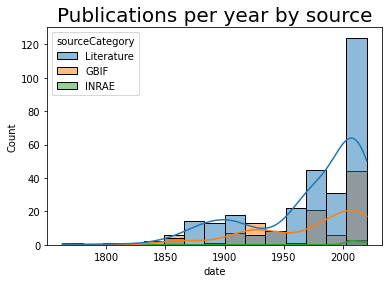

In [22]:
plot = sns.histplot(x=x, hue=hue, data=df_, fill=True, kde=True)
#plt.yscale('log')
plt.xlabel('date')
plt.title('Publications per year by source', fontsize=20)
plt.show()

In [23]:
df_ = df[['language','dateIdentified', unique_doc_id]].dropna().drop_duplicates()
langs = pd.value_counts(df_['language']).iloc[0:3].index
df_ = df_[df.language.isin(langs)]
df_.head()

/tmp/ipykernel_3275/3231976791.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ = df_[df.language.isin(langs)]


,language,dateIdentified,locationAccordingTo
0,English,1763.0,Scopoli JA (1763) Entomologia Carniolica exhib...
1,German,1805.0,Bechstein JM & Scharfenberg GL (1805) Vollstan...
2,English,1837.0,Curtis J (1837) A guide to an arrangement of B...
3,German,1848.0,Foerster A (1848) Uebersicht der gattungen und...
6,English,1852.0,Gray JE & Walker F (1852) List of the specimen...


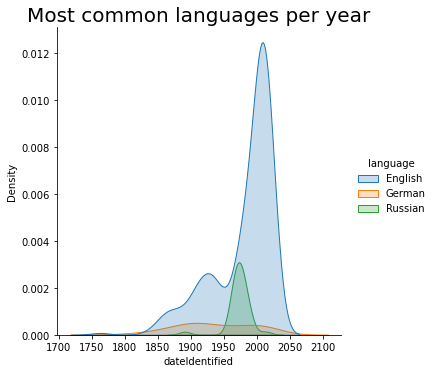

In [24]:
plot = sns.displot(x='dateIdentified',hue='language', fill=True,data=df_, kind="kde")
#plot = sns.histplot(x='dateIdentified',hue='language',data=df_, bins=10)
#plt.yscale('log')
plt.title('Most common languages per year', fontsize=20)
plt.show()

In [25]:
df_ = df[['language','dateIdentified', 'locationAccordingTo']].dropna().drop_duplicates()
eng = pd.value_counts(df_['language']).iloc[0:1].index
oth = pd.value_counts(df_['language']).iloc[1:].index
df_.loc[df['language'].isin(oth), 'language'] = 'other'
df_.head()

,language,dateIdentified,locationAccordingTo
0,English,1763.0,Scopoli JA (1763) Entomologia Carniolica exhib...
1,other,1805.0,Bechstein JM & Scharfenberg GL (1805) Vollstan...
2,English,1837.0,Curtis J (1837) A guide to an arrangement of B...
3,other,1848.0,Foerster A (1848) Uebersicht der gattungen und...
6,English,1852.0,Gray JE & Walker F (1852) List of the specimen...


In [26]:
plot = sns.histplot(x=x, y=hue, data=df_, fill=True, kde=True)
#plot = sns.histplot(x='dateIdentified',hue='language',data=df_, bins=10)
#plt.yscale('log')
#plt.xlim(1700, 2022)
plt.xlabel('date')
plt.title('Most common languages per year', fontsize=20)
plt.show()

ValueError: Could not interpret value `sourceCategory` for parameter `y`

In [ ]:
stats = pd.DataFrame(index=['length','min', 'max'])
for col in df.columns:
    values = np.array(list(set(df[col])))
    try:
        stats[col] = [values.size, np.nanmin(values), np.nanmax(values)]
    except:
        stats[col] = [values.size, np.nan, np.nan]
stats

,catalogNumber,sourceCategory,dateIdentified,database,language,observ,PDF,Corpus_PDF_references,References Endnote,associatedReferences,locationAccordingTo,Unnamed: 11
length,1975.0,3.0,742.0,13.0,16.0,5.0,2.0,207.0,289.0,385.0,385.0,3.0
min,NaN,NaN,1763.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Database

In [ ]:
x='dateIdentified'
hue='database'
title='Most common databases per year'

In [ ]:
df_ = df[[x,hue, 'locationAccordingTo']].dropna().drop_duplicates()
common = pd.value_counts(df_[hue]).iloc[0:].index

df_ = df_[df[hue].isin(common)]
df_.head()

/tmp/ipykernel_14944/3882013617.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ = df_[df[hue].isin(common)]


,dateIdentified,database,locationAccordingTo
0,1763.0,Psyl'list,Scopoli JA (1763) Entomologia Carniolica exhib...
1,1805.0,BHL,Bechstein JM & Scharfenberg GL (1805) Vollstan...
2,1837.0,BHL,Curtis J (1837) A guide to an arrangement of B...
3,1848.0,Psyl'list,Foerster A (1848) Uebersicht der gattungen und...
6,1852.0,BHL,Gray JE & Walker F (1852) List of the specimen...


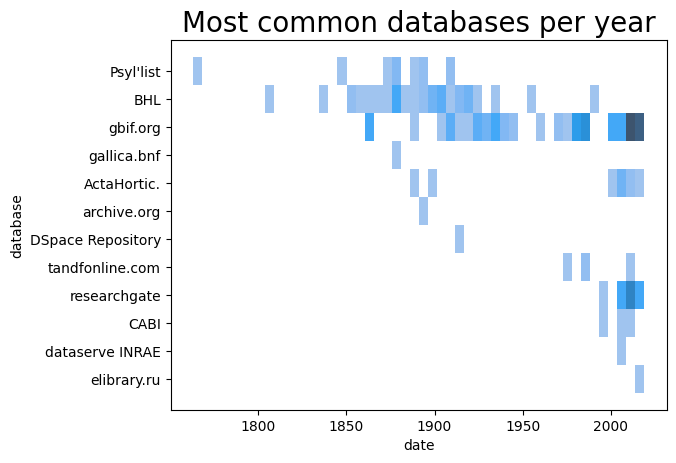

In [ ]:
#plot = sns.displot(x=x,hue=hue,data=df_, kind="kde", cut=0)
plot = sns.histplot(x=x,y=hue,data=df_, bins=50)
#plt.yscale('log')
plt.xlabel('date')
plt.title(title, fontsize=20)
plt.show()

# Pdf Availability

In [ ]:
x='dateIdentified'
hue='PDF'
title='PDF availability per year'

In [ ]:
df_ = df[[x,hue, 'locationAccordingTo']].dropna().drop_duplicates()
common = pd.value_counts(df_[hue]).iloc[0:5].index

df_ = df_[df[hue].isin(common)]
df_.head()

/tmp/ipykernel_14944/3792648767.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ = df_[df[hue].isin(common)]


,dateIdentified,PDF,locationAccordingTo
0,1763.0,PDF,Scopoli JA (1763) Entomologia Carniolica exhib...
1,1805.0,PDF,Bechstein JM & Scharfenberg GL (1805) Vollstan...
2,1837.0,PDF,Curtis J (1837) A guide to an arrangement of B...
3,1848.0,PDF,Foerster A (1848) Uebersicht der gattungen und...
6,1852.0,PDF,Gray JE & Walker F (1852) List of the specimen...


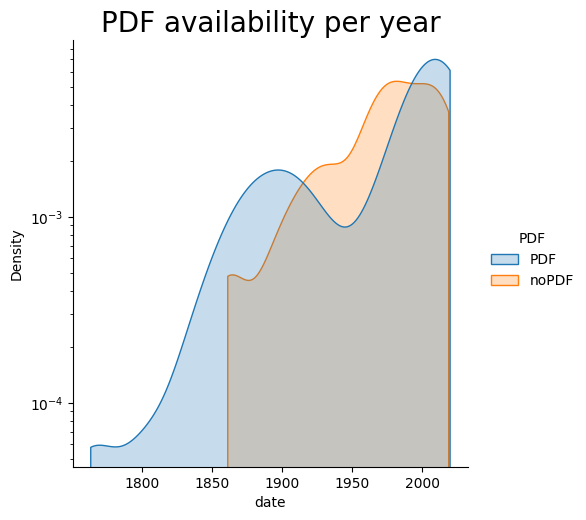

In [ ]:
plot = sns.histplot(x=x, y=hue, data=df_, fill=True, kde=True)
#plot = sns.histplot(x='dateIdentified',hue='language',data=df_, bins=10)
plt.yscale('log')
plt.xlabel('date')
plt.title(title, fontsize=20)
plt.show()

# Observ

In [ ]:
x='dateIdentified'
hue='observ'
title='Text accessibility per year'

In [ ]:
df_ = df[[x,hue, 'locationAccordingTo']].dropna().drop_duplicates()
common = pd.value_counts(df_[hue]).iloc[:].index
print(list(set(df_.observ.values)))
df_['observ'] = df_['observ'].replace(['^need.*'], ['paywall'], regex=True)
print(list(set(df_.observ.values)))
df_.head()
df_.sample(5)

['only paper version', 'not available online', 'problem with link', 'freely available online', 'need access, only title & abstract online']
['not available online', 'only paper version', 'problem with link', 'freely available online', 'paywall']


,dateIdentified,observ,locationAccordingTo
475,2006.0,problem with link,"Ackermann T, Hohn H & Bunter M (2006) Europais..."
1063,2017.0,freely available online,Przybylowicz L (2017). Invertebrata Collection...
169,1949.0,paywall,Schaefer HA (1949) Beitrage zur Kenntnis der P...
284,1981.0,freely available online,Natural History Museum (2020). Natural History...
247,1975.0,only paper version,"Gegechkori AM (1975) Psyllids (Homoptera, Psyl..."


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


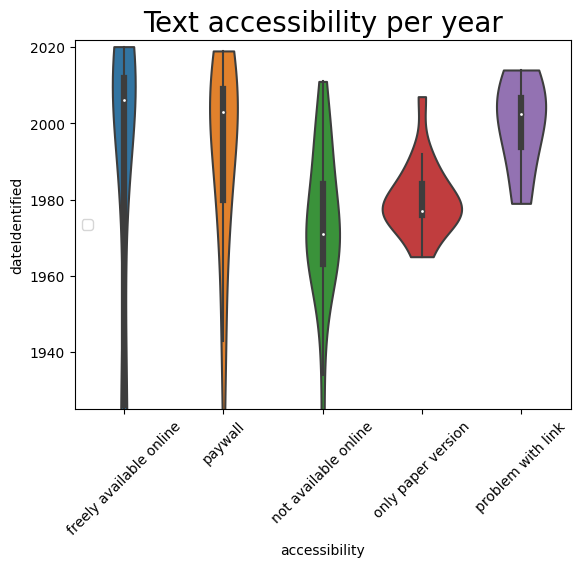

In [ ]:
plot = sns.violinplot(x=hue,y=x,data=df_, cut=0)
#plot = sns.histplot(x='dateIdentified',hue='language',data=df_, bins=10)
#plt.yscale('log')
plt.xlabel('accessibility')
plt.xticks(rotation=45)
plt.ylim(1925, 2022)
plt.title(title, fontsize=20)

plt.legend(loc='center left')

plt.show()